# Major 2

### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [3]:
from matplotlib import pylab 
params = {'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.titlesize' : 22, 'axes.labelsize' : 20, 'legend.fontsize': 18, 'legend.title_fontsize': 22, 'figure.titlesize': 24 } 
pylab.rcParams.update(params)

In [4]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    import numpy as np
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

In [5]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [6]:
train = train.drop(columns=train.columns[0])
test = test.drop(columns=test.columns[0])

### Part 1

/home/itai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


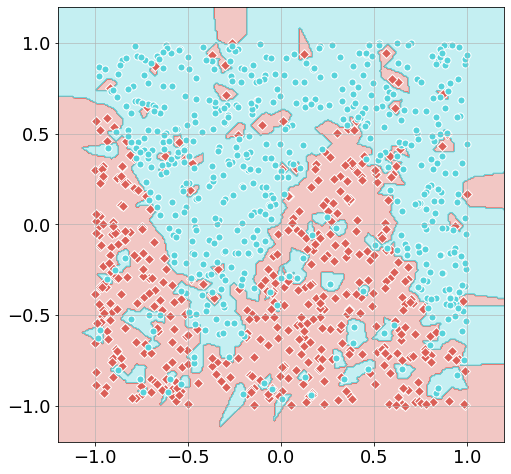

In [6]:
# Q1

from sklearn.neighbors import KNeighborsClassifier

labels = ['PCR_01','PCR_09']
target = 'spread'
Xtrain = train[labels]
Ytrain = train[target]
Xtest = test[labels]
Ytest = test[target]

kNNclass = KNeighborsClassifier(1)
kNNclass.fit(Xtrain, Ytrain)

predY = kNNclass.predict(Xtrain)
visualize_clf(kNNclass, Xtrain, Ytrain, '','','')

In [7]:
# Q2

from sklearn.model_selection import cross_validate

# param_space = list(range(1, 20, 2)) + list(range(20, 871, 85))
param_space = np.floor(np.logspace(0, np.log10(871), 20)).astype(int)
test_scores = []
train_scores = []
for lmbda in param_space:
    estimator = KNeighborsClassifier(lmbda)
    scores = cross_validate(estimator, Xtrain, Ytrain, cv=8, return_train_score=True)
    test_scores.append(np.mean(scores['test_score']))
    train_scores.append(np.mean(scores['train_score']))

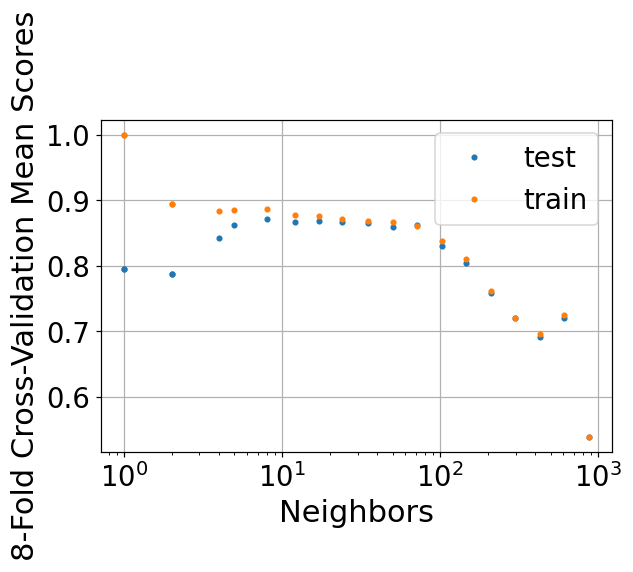

In [8]:
plt.figure(dpi=110)
plt.plot(param_space, test_scores, '.', label='test')
plt.plot(param_space, train_scores, '.', label='train')
plt.xlabel('Neighbors')
plt.ylabel('8-Fold Cross-Validation Mean Scores')
plt.semilogx()
plt.grid()
plt.legend()
plt.show()

/home/itai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


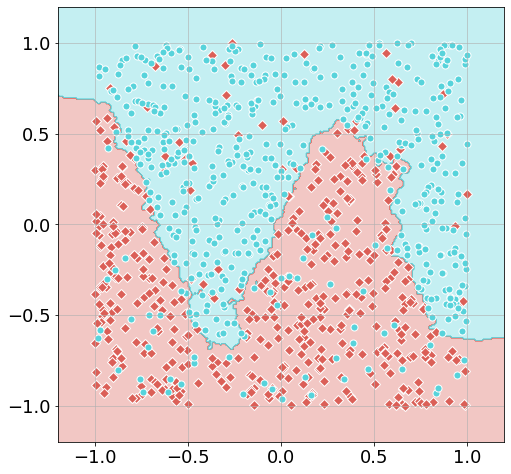

optimal k: 8, test_score: 0.872


In [9]:
# Q4 
opt_i = np.argmax(test_scores)
k_opt = param_space[opt_i]
test_score_opt = test_scores[opt_i]

kNNclass = KNeighborsClassifier(k_opt)
kNNclass.fit(Xtrain, Ytrain)
visualize_clf(kNNclass, Xtrain, Ytrain, '','','')

print(f"optimal k: {k_opt}, test_score: {kNNclass.score(Xtest, Ytest)}")

/home/itai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


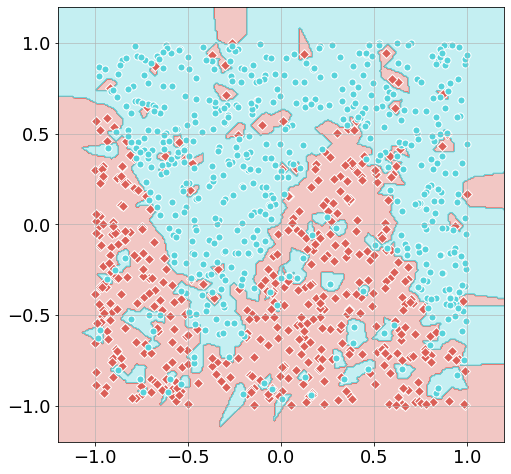

/home/itai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


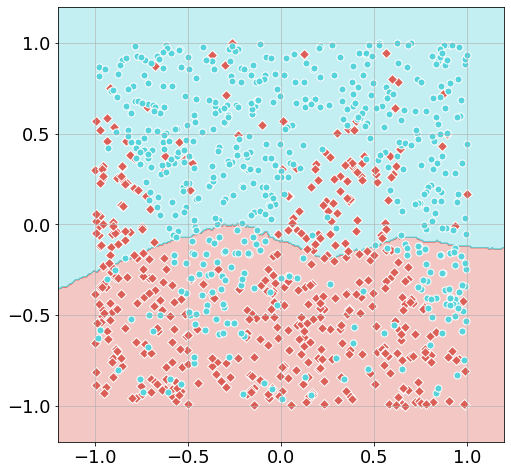

In [10]:
# Q5

kNNclass1 = KNeighborsClassifier(1)
kNNclass501 = KNeighborsClassifier(501)

kNNclass1.fit(Xtrain, Ytrain)
kNNclass501.fit(Xtrain, Ytrain)

visualize_clf(kNNclass1, Xtrain, Ytrain, '','','')
visualize_clf(kNNclass501, Xtrain, Ytrain, '','','')

In [11]:
# Q6 - Process

Xtrain = train.drop(columns=['spread','risk'])
Ytrain = train['spread']

# param_space = list(range(1, 20, 2)) + list(range(20, 871, 85))
param_space = np.floor(np.logspace(0, np.log10(871), 20)).astype(int)
test_scores = []
train_scores = []
for lmbda in param_space:
    estimator = KNeighborsClassifier(lmbda)
    scores = cross_validate(estimator, Xtrain, Ytrain, cv=8, return_train_score=True)
    test_scores.append(np.mean(scores['test_score']))
    train_scores.append(np.mean(scores['train_score']))

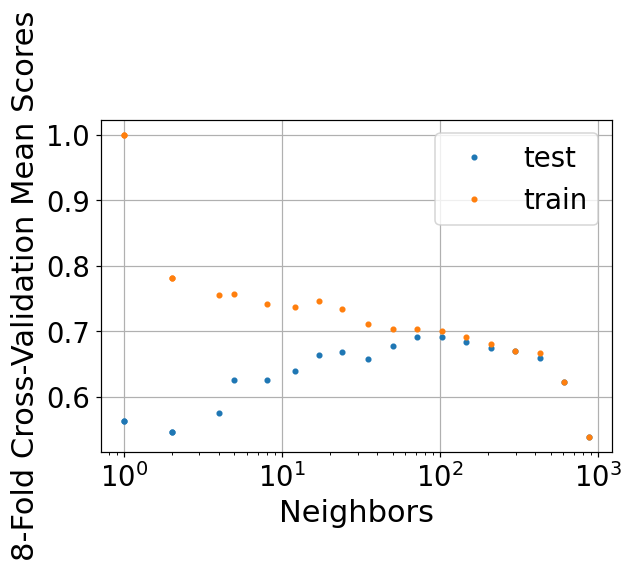

In [12]:
# Q6 - Visualize

plt.figure(dpi=110)
plt.plot(param_space, test_scores, '.', label='test')
plt.plot(param_space, train_scores, '.', label='train')
plt.xlabel('Neighbors')
plt.ylabel('8-Fold Cross-Validation Mean Scores')
plt.semilogx()
plt.grid()
plt.legend()
plt.show()

### Part 2

Test accuracy is 0.72
Train accuracy is 0.712


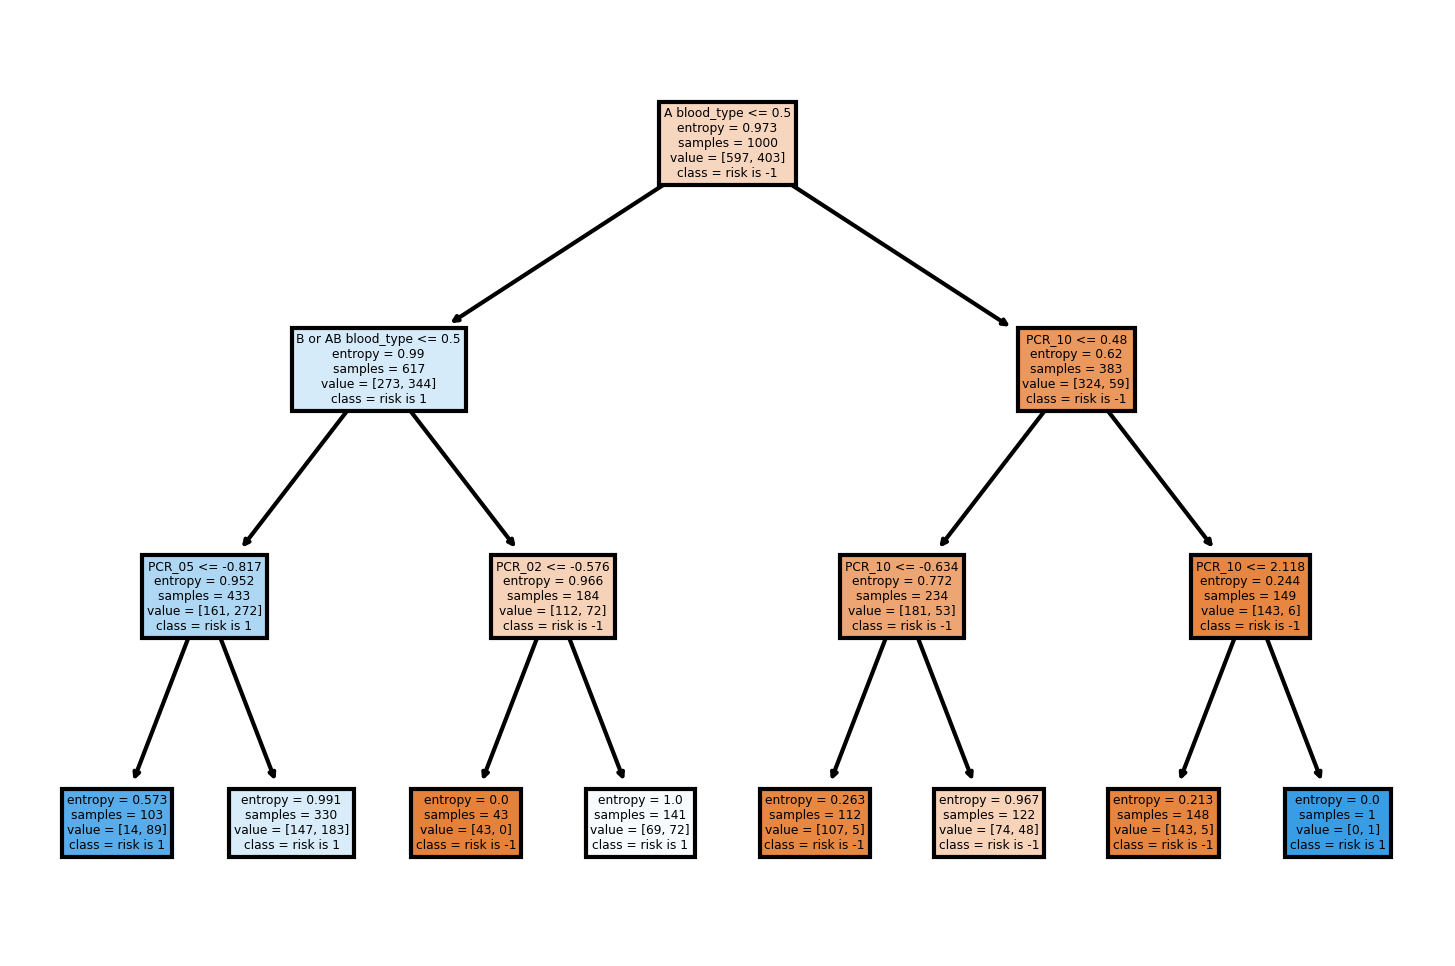

In [30]:
# Q7
from sklearn.tree import DecisionTreeClassifier, plot_tree

target = 'risk'
Xtrain = train.drop(columns=['risk','spread'])
Ytrain = train[target]
Xtest = test.drop(columns=['risk','spread'])
Ytest = test[target]

id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
id3.fit(Xtrain, Ytrain)
plt.figure(dpi=300)
plot_tree(id3, filled=True, feature_names=Xtrain.columns, class_names=['risk is -1', 'risk is 1'])
print(f"Test accuracy is {id3.score(Xtest, Ytest)}")
print(f"Train accuracy is {id3.score(Xtrain, Ytrain)}")

In [22]:
# Q8 - learn

from sklearn.model_selection import GridSearchCV

max_depth_space = [3, 4, 5, 6, 7, 8, 9]
min_samples_leaf_space = [6, 9, 12, 15, 18, 21, 24, 27, 30]
folds = 8
gs = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid={'max_depth': max_depth_space, 'min_samples_leaf': min_samples_leaf_space}, cv=folds, return_train_score=True)

gs.fit(Xtrain, Ytrain)
cv_results = pd.DataFrame(gs.cv_results_)

mean_train_score = cv_results.pivot_table(values='mean_train_score', index='param_max_depth', columns='param_min_samples_leaf')
mean_test_score = cv_results.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_min_samples_leaf')

Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=18)
With Mean Test Score: 0.867


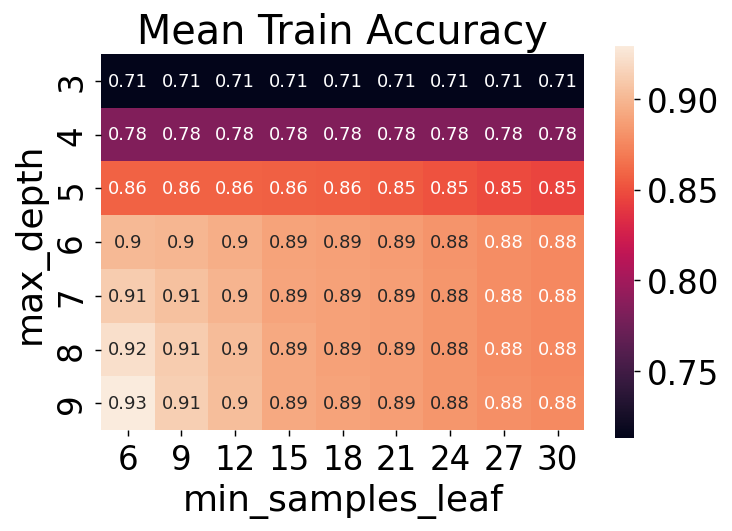

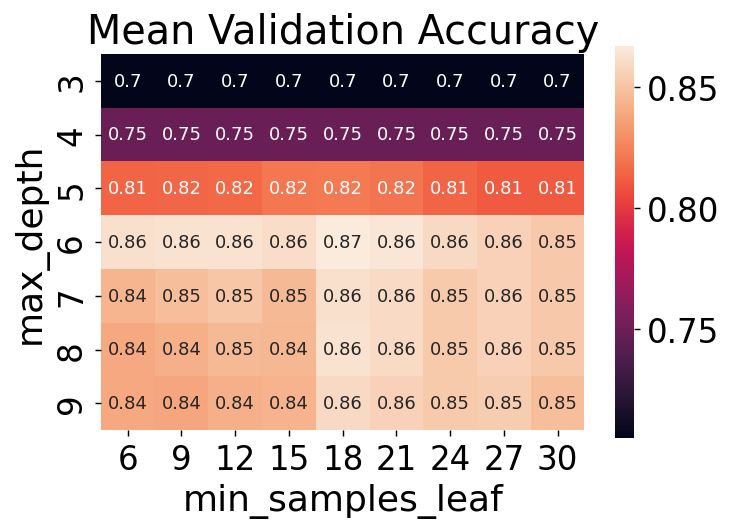

In [25]:
# Q8 - plot

print(f"Best Estimator: {gs.best_estimator_}")
print(f"With Mean Test Score: {gs.best_score_}")
plt.figure(dpi=130)
sns.heatmap(mean_train_score, square=True, annot=True)
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.title('Mean Train Accuracy')
plt.show()
plt.figure(dpi=130)
sns.heatmap(mean_test_score, square=True, annot=True)
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.title('Mean Validation Accuracy')
plt.show()

Test accuracy is: 0.848


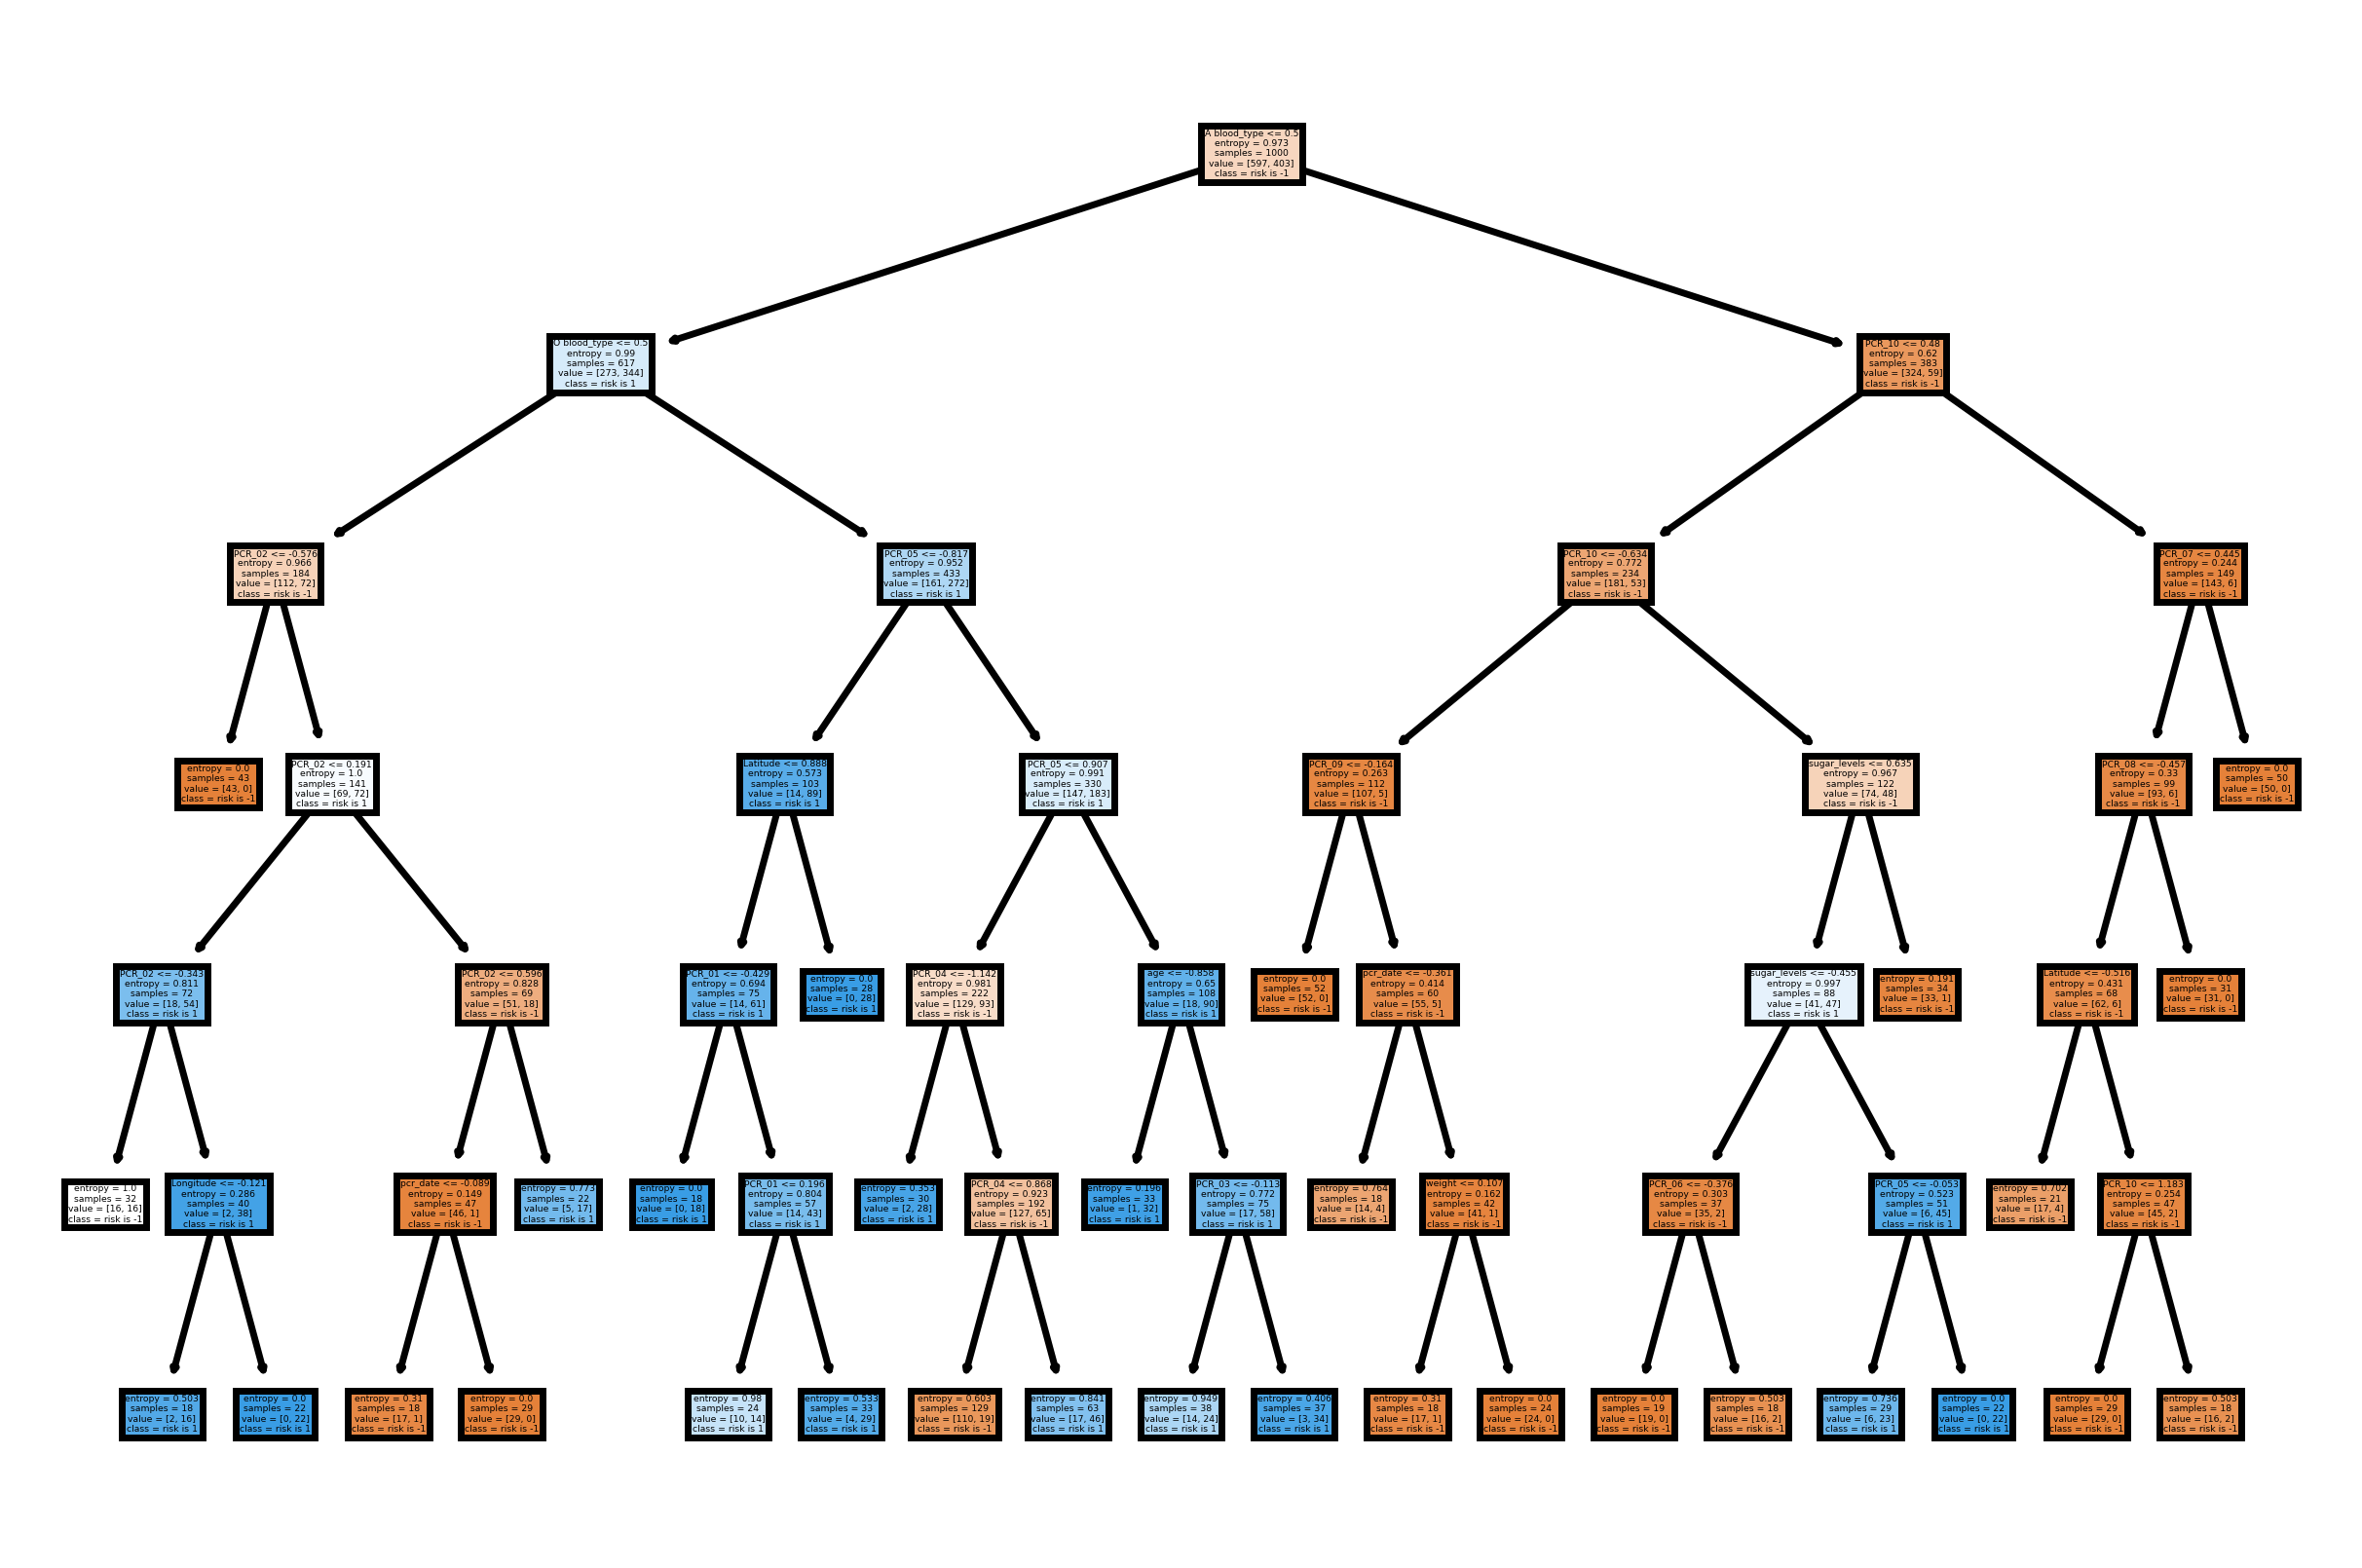

In [38]:
# Q9 

id3 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=18)
id3.fit(Xtrain, Ytrain)
plt.figure(dpi=500)
plot_tree(id3, filled=True, feature_names=Xtrain.columns, class_names=['risk is -1', 'risk is 1'])
plt.savefig('q9',dpi=500)
print(f"Test accuracy is: {id3.score(Xtest, Ytest)}")

### Part 3

In [31]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        loss = norm**2 + C * np.sum(np.maximum(0, 1-hinge_inputs))

        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        
        # if geq 1 returns 0, otherwise returns -1 (differs slightly from PDF in the case of z=1)
        f = (np.sign(hinge_inputs-1)/2-1/2).reshape(-1)
        g_w = 2*w + C*np.sum(np.diag(y*f)@X, axis=0)
        g_b = C*np.sum(f*y)

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]
        
        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr*g_w
            self.b = self.b - self.lr*g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = np.sign((X.dot(self.w) + self.b))

        return y_pred


In [28]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()

In [29]:
# Q10

labels = ['PCR_01','PCR_09']
target = 'spread'
X_train = train[labels].values
Y_train = train[target].values

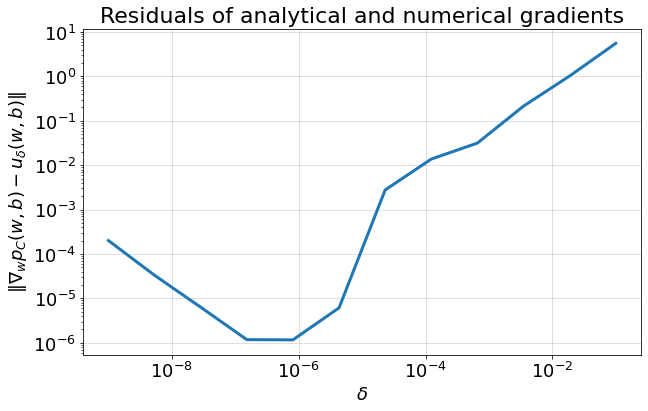

In [30]:
compare_gradients(X_train, Y_train, deltas=np.logspace(-9,-1,12))

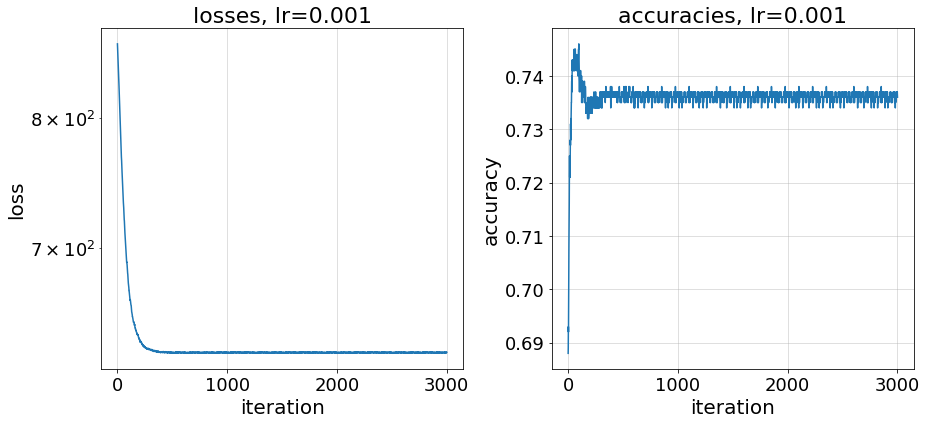

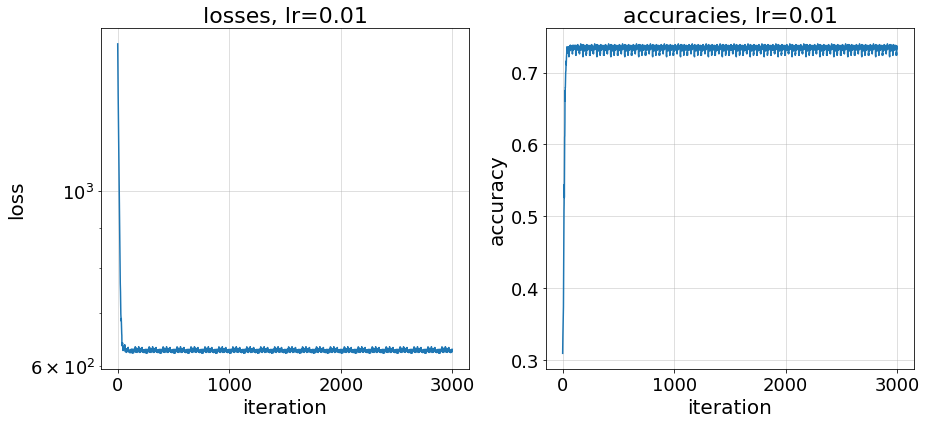

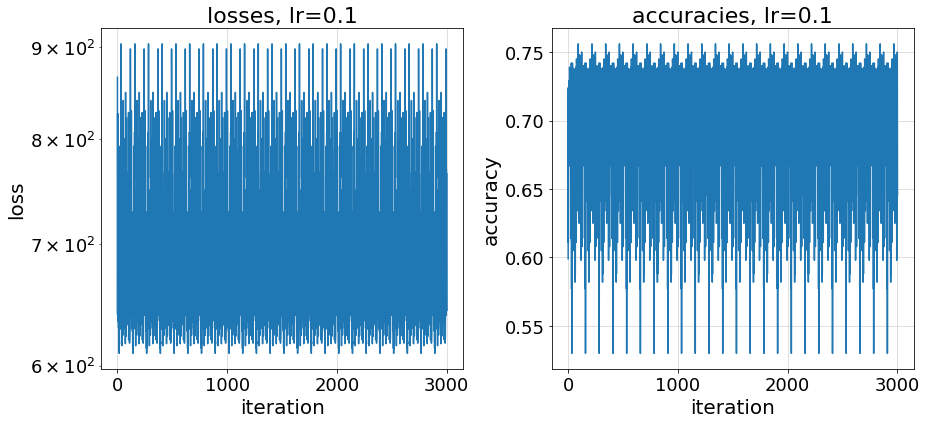

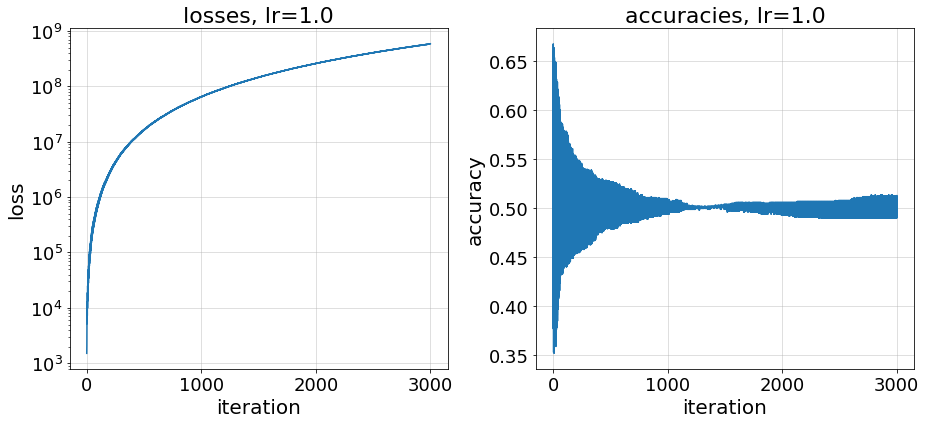

In [40]:
# Q11

for lr in np.logspace(-3,0,4):
    clf = SoftSVM(C=1, lr=lr) 
    losses, accuracies = clf.fit_with_logs(X_train, Y_train, max_iter=3000) 
    plt.figure(figsize=(13, 6)) 
    plt.subplot(121)
    plt.grid(alpha=0.5)
    plt.title (f"losses, lr={lr}") 
    plt.semilogy(losses)
    plt.xlabel("iteration")
    plt.ylabel("loss") 
    plt.subplot(122) 
    plt.grid(alpha=0.5)
    plt.title (f"accuracies, lr={lr}") 
    plt.plot(accuracies)
    plt.xlabel("iteration")
    plt.ylabel("accuracy") 
    plt.tight_layout()
    plt.show()

### Part 4

In [9]:
from sklearn.svm import SVC

labels = ['PCR_01','PCR_09']
target = 'spread'
X_train = train[labels].values
Y_train = train[target].values

gamma_space = np.logspace(-4, 4, 9)
clf_space = []
for gamma in gamma_space:
    print(f"Fitting gamma={gamma}")
    clf = SVC(kernel='rbf',C=1e4,gamma=gamma)
    clf.fit(X_train, Y_train)
    clf_space.append(clf)

Fitting gamma=0.0001
Fitting gamma=0.001
Fitting gamma=0.01
Fitting gamma=0.1
Fitting gamma=1.0
Fitting gamma=10.0
Fitting gamma=100.0
Fitting gamma=1000.0
Fitting gamma=10000.0


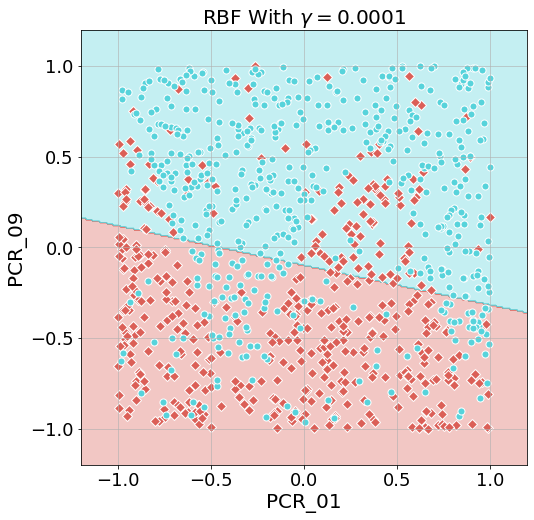

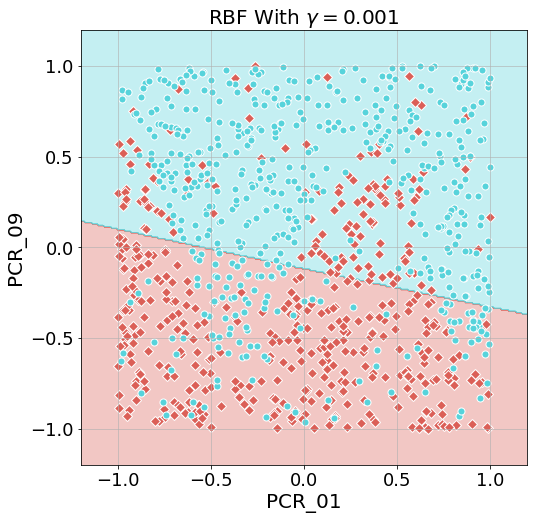

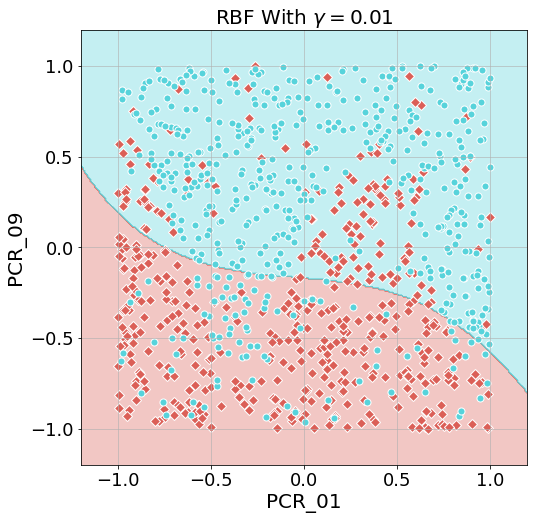

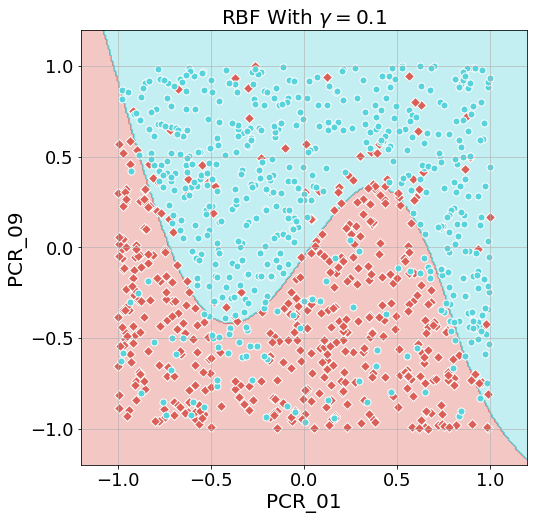

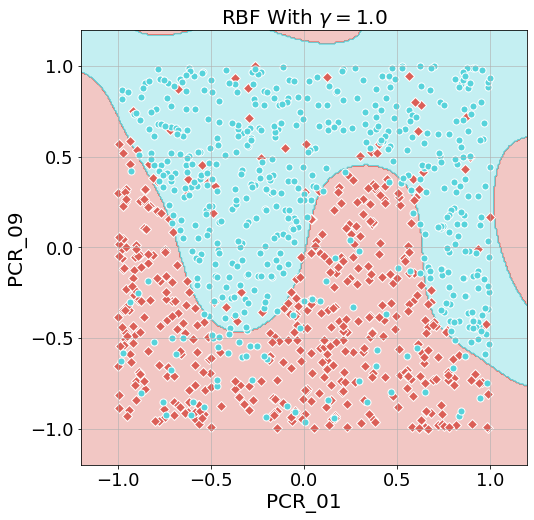

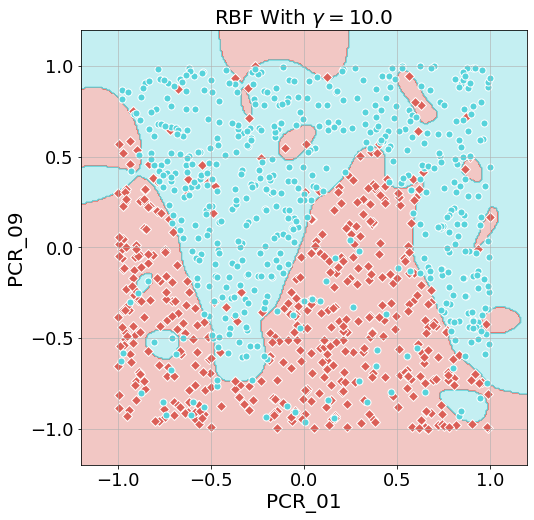

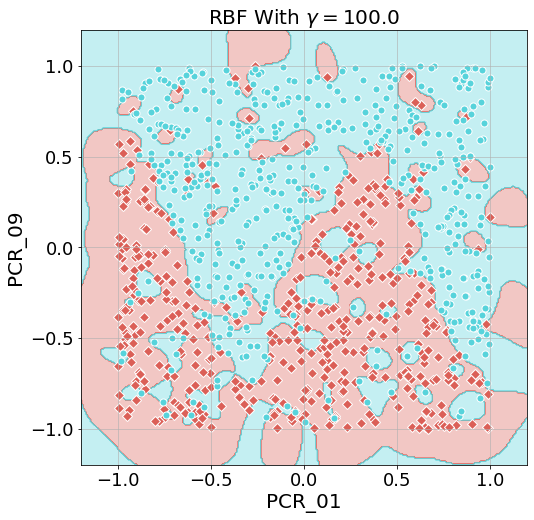

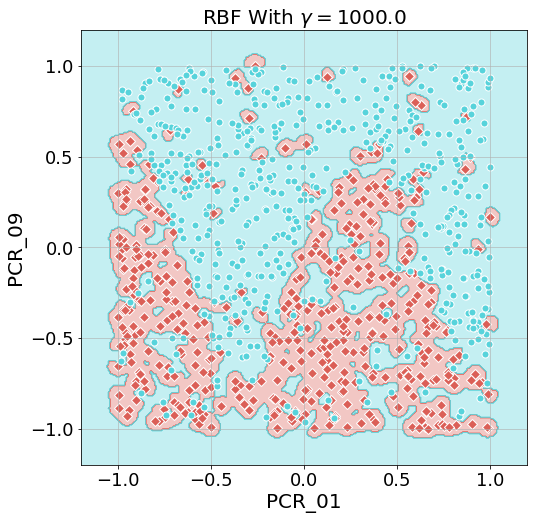

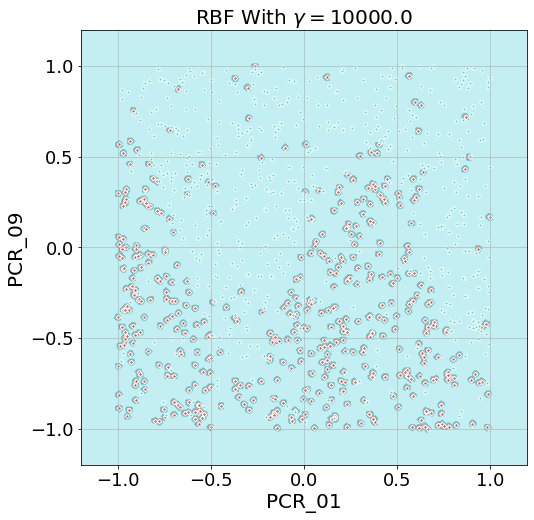

In [12]:
for gamma, clf in zip(gamma_space, clf_space):
    if gamma == gamma_space[-1]:
        visualize_clf(clf, X_train, Y_train, f'RBF With $\gamma={gamma}$', 'PCR_01', 'PCR_09', marker_size=10)
    else:
        visualize_clf(clf, X_train, Y_train, f'RBF With $\gamma={gamma}$', 'PCR_01', 'PCR_09')